# Agrupamento Hierárquico

In [13]:
import pandas as pd
import numpy as np

In [14]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Base Salário x Idade

In [15]:
X = [20, 27, 21, 37, 46, 53, 55, 47, 52, 32, 39, 41, 39, 48, 48]
y = [1000, 1200, 2900, 1850, 900, 950, 200, 2100, 300, 5500, 4100, 5100, 7000, 5000, 6500]
base_salario = np.array([(list(i)) for i in zip(X, y)])
base_salario.shape

(15, 2)

In [16]:
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)
base_salario.shape

(15, 2)

In [17]:
grafico = px.scatter(x=base_salario[:,0], y=base_salario[:,1])
grafico.show()

### Fazendo o dendograma 

Para definir o número de clusters.

In [18]:
#!pip install scipy

In [19]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

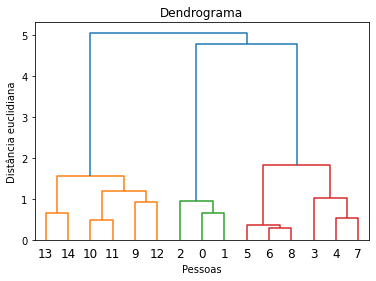

In [20]:
dendrograma = dendrogram(linkage(base_salario, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância euclidiana');

(ai mds que lindo!!!)

Temos 3 clusters

In [21]:
hc_salario = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
rotulos = hc_salario.fit_predict(base_salario)
rotulos

array([2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
grafico = px.scatter(x=base_salario[:,0], y=base_salario[:,1], color=rotulos)
grafico.show()

## Base Cartão Crédito

In [23]:
base_cartao = pd.read_csv('credit_card_clients.csv', header=1)
print(base_cartao.shape)
base_cartao.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
base_cartao['BILL_TOTAL'] = base_cartao['BILL_AMT1'] + base_cartao['BILL_AMT2'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT4'] + base_cartao['BILL_AMT5'] + base_cartao['BILL_AMT6']
X_cartao = base_cartao.iloc[:,[1,25]].values #LIMIT_BAL e BILL_TOTAL
scaler_cartao = StandardScaler()
X_cartao = scaler_cartao.fit_transform(X_cartao)
X_cartao.shape

(30000, 2)

In [26]:
dendrograma = dendrogram(linkage(X_cartao, method='ward'))

MemoryError: Unable to allocate 3.35 GiB for an array with shape (449985000,) and data type float64